In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import seaborn as sns
from sklearn.datasets import make_circles

In [5]:
#Set number of samples

n_samples = 1000

x,y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [3]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

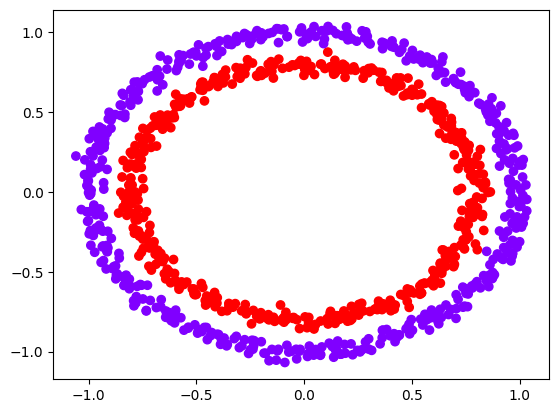

In [6]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow')

In [31]:
#Set global seed
tf.random.set_seed(42)

#Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


#defining ideal learning rate
#lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))


#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.02), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

#Fit model
history = model.fit(x, y, epochs=100, verbose=0)

In [32]:
model.evaluate(x, y)
y_pred = model.predict(x)


32/32 [==============================] - 0s 1ms/step


In [33]:
def Decision_boundary_plot(model, x, y):

    '''
    Plots the Decision boundary created by prediction on features
    '''
    #Set Boundaries for the axes
    x_min, x_max = x[:, 0].min()-0.1, x[:,0].max()+0.1
    y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max()+0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    #Create features to make predictions on
    
    x_in = np.c_[xx.ravel(), yy.ravel()] #Stack 2D arrays together
    
    #Make predictions on x_in
    y_pred = model.predict(x_in)
    
    #Check what classification problem we are considering
    if len(y_pred[0]) > 1:
        print("We are dealing with a multiclass problem!")
        
        y_pred =np.argmax(y_pred, axis=1).reshape(xx.shape)   
        
    else:
        print('this is a binaryclass problem')
        y_pred =np.round(y_pred).reshape(xx.shape)
    
    #Plot the Decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    
    plt.scatter(x[: ,0], x[:, 1], c=y, s=40, cmap='rainbow')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



313/313 [==============================] - 0s 953us/step
this is a binaryclass problem


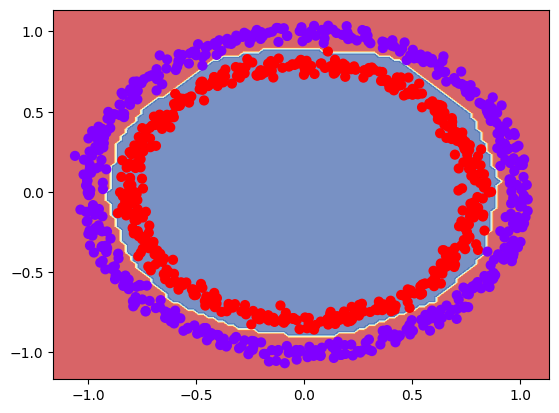

In [34]:
Decision_boundary_plot(model=model, x=x, y=y)

Text(0, 0.5, 'Loss and Accuracy')

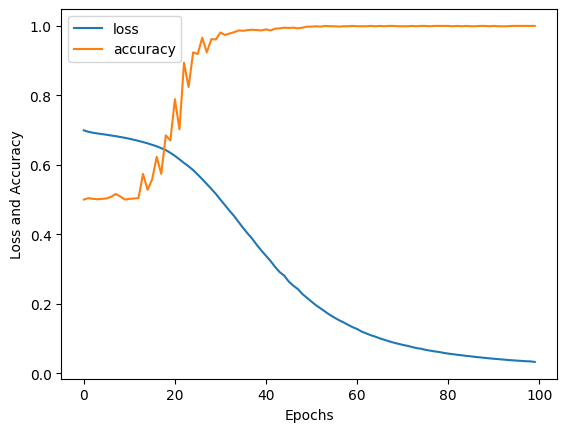

In [35]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')

In [36]:
from sklearn.metrics import confusion_matrix



In [37]:
confusion_matrix(y, tf.round(y_pred))

array([[500,   0],
       [  0, 500]], dtype=int64)

In [38]:
import itertools

range(0, 2)

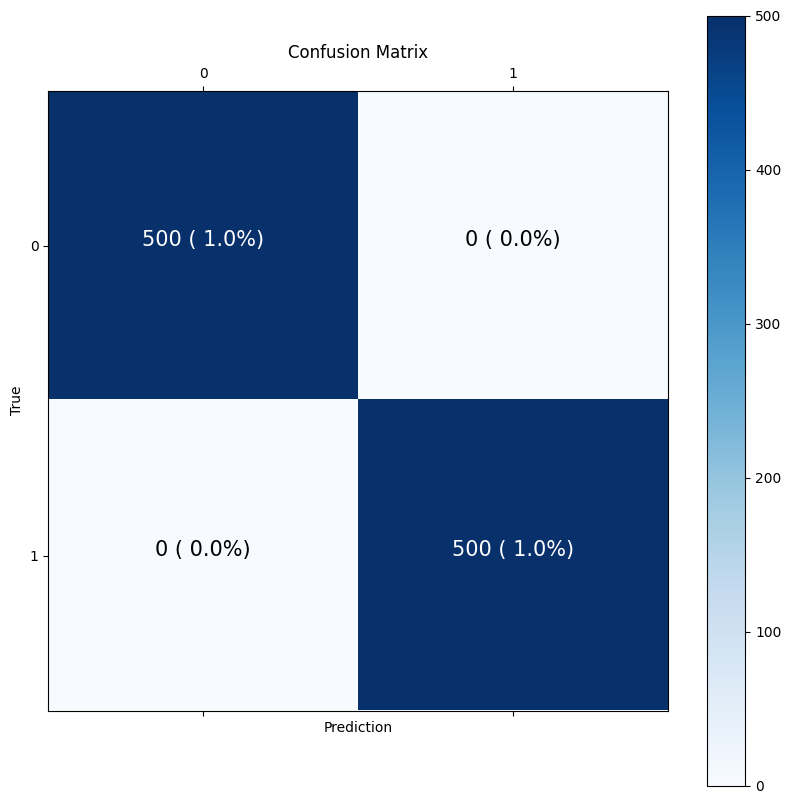

In [39]:
#Create confusion matrix

cm = confusion_matrix(y, tf.round(y_pred))

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  #normalizes the confusion matrix to give percentages

#Set number of classes 

n_classes = cm.shape[0]


#Make confusion matrix nicer
fig, ax = plt.subplots(figsize=(10,10))

#Create matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
    labels = classes

else:
    labels = np.arange(cm.shape[0])


#Set Axis
ax.set(title='Confusion Matrix',
       xlabel='Prediction',
       ylabel='True',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
      )

#Set threshold for different colors

threshold = (cm.max() + cm.min()) / 2.


#Plot Text
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    
    plt.text(j, i, f"{cm[i,j]} ({cm_normalized[i,j]: .1f}%)", horizontalalignment='center',
            color='white' if cm[i,j] > threshold else 'black', size=15)
